In [1]:
using Pkg
Pkg.activate("C:\\Users\\Alex\\Desktop\\repo\\2612\\0903\\dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\repo\2612\0903\dynamical-systems\env\integrate`


In [2]:
using JLD, CairoMakie

In [3]:
cd("C:\\Users\\Alex\\Desktop\\repo\\2612\\0903\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Сопоставление с матконт")

In [4]:
modes= load("Modes_200x200.jld")["data"];

In [5]:
I0double = load("I0doubleext_approx.jld")["data"]
U0double = load("U0doubleext_approx.jld")["data"]
I0double = I0double[:]
U0double = U0double[:]

I0hopf = load("I0_Hopf_detailed.jld")["data"]
U0hopf = load("U0_Hopf_detailed.jld")["data"]
I0hopf = I0hopf[:]
U0hopf = U0hopf[:];

In [6]:
I0range = range( -0.5, -2.0,  length = 200 )
U0range = range( 0.22,  0.55, length = 200 )

0.22:0.0016582914572864321:0.55

In [7]:
length(I0double)

4000

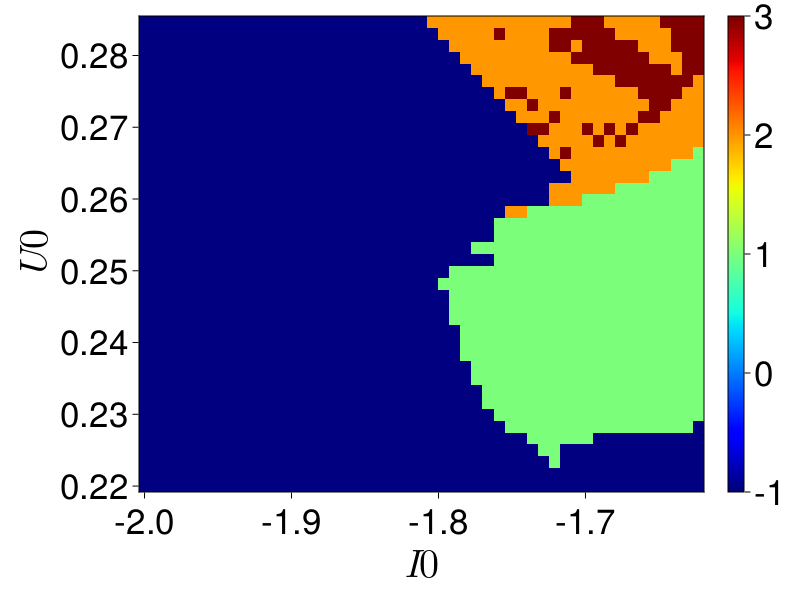

In [26]:
f = Figure(resolution = (800, 600))
ax1 = Axis(f[1, 1], xlabel = L"I0",ylabel = L"U0", xlabelsize = 40, ylabelsize = 40,
            xticklabelsize = 35, yticklabelsize = 35)

U0st, U0f = 1, 40
I0st, I0f = 150, 200
hm = heatmap!(ax1, I0range[I0st:I0f], U0range[U0st:U0f], modes[I0st:I0f, U0st:U0f],
                colormap = :jet1)

#lines!(I0double[1:end], U0double[1:end], linewidth = 4.5, color = :black)
#lines!(I0hopf[1:3060], U0hopf[1:3060], linewidth = 4.5, color = :deeppink)

Colorbar(f[1, 2], hm, ticklabelsize = 35)
f

spectrum = load("LSs_200_200_time_1000.jld")["data"]

L1 = spectrum[:, :, 1]
L1[L1 .< -0.1] .= -maximum(L1[:, :, 1])

f = Figure(resolution = (800, 600))
ax1 = Axis(f[1, 1], xlabel = L"I0",ylabel = L"U0", xlabelsize = 40, ylabelsize = 40,
            xticklabelsize = 35, yticklabelsize = 35)

hm = heatmap!(ax1, I0range, U0range, L1[:, :, 1],
                colormap = :seismic)
Colorbar(f[1, 2], hm, ticklabelsize = 35)
f